In [1]:
'''This notebook implements the Perceptron Learning classifier on
    1. The linear dataset
    2. The standardized linear dataset
    3. The standardized expanded dataset
    4. Optimal features selected from the expanded dataset'''

__author__ = 'Anjana Niranjan'
__email__ = 'anjanani@usc.edu'

**Perceptron**
Thanks to the sklearn website for examples on the functions used in this code.
Thanks to https://stackoverflow.com/questions/51194627/python-naive-bayes-with-cross-validation-using-gaussiannb-classifier for helping with cross-validation.

In [ ]:
#Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#Loading the dataset
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mpr/linearTrain.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mpr/linearTest.csv')

In [ ]:
X_train = train.iloc[:, 1:14]
y_train = train.iloc[:,14]
X_test = test.iloc[:, 1:14]
y_test = test.iloc[:, 14]

Implementing the Perceptron Learning classifier on the data by selecting the best parameters through grid search with cross validation

In [ ]:
kf = KFold(n_splits=9, random_state=None, shuffle=False)
params = {'penalty':['l1', 'l2', 'elasticnet'], 'alpha': [0.1, 0.05, 0.001], 'eta0':[0.5, 1, 5]}
clf = Perceptron()
gs = GridSearchCV(clf, cv=kf, param_grid=params, return_train_score=True)

gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=9, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=0, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.05, 0.001], 'eta0': [0.5, 1, 5],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
#Results of grid search with cross validation
gs.cv_results_

{'mean_fit_time': array([0.13063516, 0.13108158, 0.18472022, 0.14919625, 0.10074184,
        0.16997205, 0.13458061, 0.07701251, 0.13440114, 0.14217814,
        0.15788256, 0.20213011, 0.16060315, 0.12079085, 0.19065788,
        0.15702966, 0.08551309, 0.15180045, 0.1993351 , 0.10746113,
        0.1439867 , 0.19058683, 0.10909748, 0.16220514, 0.19107403,
        0.14548235, 0.21469641]),
 'mean_score_time': array([0.00203363, 0.00182033, 0.00144508, 0.00171669, 0.00185466,
        0.00171889, 0.00150522, 0.00187288, 0.00184369, 0.00149369,
        0.00233091, 0.00151081, 0.00182578, 0.00160429, 0.00153785,
        0.00158697, 0.00181389, 0.00171277, 0.00162641, 0.00197811,
        0.0015485 , 0.00151984, 0.00163386, 0.00163054, 0.00150487,
        0.00154201, 0.00147994]),
 'mean_test_score': array([0.72451852, 0.22096296, 0.22096296, 0.72451852, 0.25681481,
        0.25681481, 0.72451852, 0.21274074, 0.21274074, 0.69933333,
        0.34740741, 0.34740741, 0.69933333, 0.22096296, 0.220

In [ ]:
#Best parameters
gs.best_params_

{'alpha': 0.1, 'eta0': 0.5, 'penalty': 'l1'}

In [ ]:
#Best score
gs.best_score_

0.7245185185185185

In [ ]:
#Training the model with best parameters
bestclf = Perceptron(alpha= 0.1, eta0= 0.5, penalty= 'l1')
bestclf.fit(X_train, y_train)
tr_p = bestclf.predict(X_train)
print(accuracy_score(y_train, tr_p))
confusion_matrix(y_train, tr_p)

0.7296296296296296


array([[2542,    0,  166,   73,    3],
       [  28, 2062,   11,   24,  457],
       [ 165,    6, 2478,    0,    0],
       [ 137,    0, 1971,  367,    1],
       [ 510,   93,    5,    0, 2401]])

In [ ]:
#Running the model on the test set
predictions = bestclf.predict(X_test)
print(accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)

0.8837859614199726


array([[3542,   48,  673,   69,  134],
       [   2, 4248,   39,  109,    4],
       [  68,    0, 4711,    0,    0],
       [1062,    1,   29, 2822,    0],
       [  99,   14,    8,   93, 3324]])

Implementing Perceptron Learning classifier on Normalized data

In [ ]:
#Normalizing the linear dataset
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
kf = KFold(n_splits=9, random_state=None, shuffle=False)
params = {'penalty':['l1', 'l2', 'elasticnet'], 'alpha': [0.1, 0.05, 0.001], 'eta0':[0.5, 1, 5]}
clf = Perceptron()
gs = GridSearchCV(clf, cv=kf, param_grid=params, return_train_score=True)

gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=9, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=0, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.05, 0.001], 'eta0': [0.5, 1, 5],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
#Results of grid search with cross validation
gs.cv_results_

{'mean_fit_time': array([0.09790381, 0.06965574, 0.12456115, 0.11168257, 0.06894414,
        0.12616364, 0.12513855, 0.07377227, 0.13123364, 0.10297717,
        0.06697925, 0.12372245, 0.11541126, 0.07108045, 0.12714299,
        0.12003205, 0.076828  , 0.13626358, 0.11345792, 0.07343356,
        0.12218602, 0.11738531, 0.07094521, 0.11843954, 0.11790339,
        0.07000282, 0.11770773]),
 'mean_score_time': array([0.00097007, 0.00097118, 0.00087674, 0.00093097, 0.0009834 ,
        0.00083812, 0.0008831 , 0.00094329, 0.00087277, 0.00154773,
        0.00098477, 0.00085521, 0.00092506, 0.00099344, 0.00077825,
        0.00087468, 0.00100732, 0.00081129, 0.00096345, 0.00104517,
        0.00086149, 0.00088509, 0.00098628, 0.00086064, 0.00090914,
        0.00100297, 0.00091256]),
 'mean_test_score': array([0.40407407, 0.56866667, 0.56866667, 0.37814815, 0.414     ,
        0.414     , 0.43622222, 0.39155556, 0.39155556, 0.56814815,
        0.60985185, 0.60985185, 0.61059259, 0.56688889, 0.566

In [ ]:
#Best parameters
gs.best_params_

{'alpha': 0.001, 'eta0': 5, 'penalty': 'l1'}

In [ ]:
#Best score
gs.best_score_

0.8378518518518518

In [ ]:
#Training the classifier with best parameters
bestclf = Perceptron(alpha= 0.001, eta0= 5, penalty= 'l1')
bestclf.fit(X_train, y_train)
tr_p = bestclf.predict(X_train)
print(accuracy_score(y_train, tr_p))
confusion_matrix(y_train, tr_p)

0.9618518518518518


array([[2749,    0,   26,    6,    3],
       [  11, 2488,    4,   38,   41],
       [  13,    0, 2509,  127,    0],
       [   0,   34,   14, 2427,    1],
       [   1,  165,   10,   21, 2812]])

In [ ]:
#Running the model on the test set
predictions = bestclf.predict(X_test)
print(accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)

0.8935020617090857


array([[4254,   48,   78,    0,   86],
       [  26, 4244,   33,   99,    0],
       [ 300,   61, 4269,  149,    0],
       [   0,  931,   44, 2939,    0],
       [   0,  247,    0,  145, 3146]])

Implementing the Perceptron Learning classifier on the expanded dataset

In [ ]:
from sklearn.feature_selection import RFE, RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mpr/linearTrainexpanded.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mpr/linearTestexpanded.csv')

In [ ]:
X_train = train.iloc[:, 1:60]
y_train = train.iloc[:,60]
X_test = test.iloc[:, 1:60]
y_test = test.iloc[:, 60]

In [ ]:
#Normalizing the data
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
kf = KFold(n_splits=9, random_state=None, shuffle=False)
params = {'penalty':['l1', 'l2', 'elasticnet'], 'alpha': [0.1, 0.05, 0.001], 'eta0':[0.5, 1, 5]}
clf = Perceptron()
gs = GridSearchCV(clf, cv=kf, param_grid=params, return_train_score=True)

gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=9, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=0, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.05, 0.001], 'eta0': [0.5, 1, 5],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
#Results of grid search with cross validation
gs.cv_results_

{'mean_fit_time': array([0.2581589 , 0.12842186, 0.29483318, 0.26714238, 0.14523   ,
        0.34683005, 0.28548429, 0.14815516, 0.35613034, 0.27223158,
        0.13373544, 0.31019187, 0.29315448, 0.12793599, 0.29742943,
        0.31615649, 0.14551904, 0.34946018, 0.30505265, 0.13060308,
        0.27662203, 0.30791876, 0.12915836, 0.27827764, 0.31053188,
        0.13715559, 0.30924114]),
 'mean_score_time': array([0.00209241, 0.00246453, 0.00208773, 0.00208963, 0.0020638 ,
        0.00211141, 0.00209334, 0.00218569, 0.00208879, 0.00209872,
        0.002129  , 0.00214397, 0.00218034, 0.00214895, 0.00215504,
        0.00212402, 0.00270049, 0.00208704, 0.00209199, 0.00207882,
        0.00211856, 0.00209342, 0.00208982, 0.0026949 , 0.00209451,
        0.00207731, 0.00208526]),
 'mean_test_score': array([0.41155556, 0.59992593, 0.59992593, 0.43081481, 0.44614815,
        0.44614815, 0.40762963, 0.34903704, 0.34903704, 0.62962963,
        0.61777778, 0.61777778, 0.61866667, 0.60125926, 0.601

In [ ]:
#Best estimator
gs.best_estimator_

Perceptron(alpha=0.001, class_weight=None, early_stopping=False, eta0=0.5,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty='l1', random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Best parameters
gs.best_params_

{'alpha': 0.001, 'eta0': 0.5, 'penalty': 'l1'}

In [ ]:
#Best score
gs.best_score_

0.8297777777777777

In [ ]:
#Training the model with best parameters
bestclf = Perceptron(alpha= 0.001, eta0= 0.5, penalty= 'l1')
bestclf.fit(X_train, y_train)
tr_p = bestclf.predict(X_train)
print(accuracy_score(y_train, tr_p))
confusion_matrix(y_train, tr_p)

0.948


array([[2782,    0,    0,    0,    2],
       [   9, 2531,    2,   20,   20],
       [  19,    2, 2319,  305,    4],
       [   4,   29,   16, 2400,   27],
       [   2,  192,   33,   16, 2766]])

In [ ]:
#Running the model on test set
predictions = bestclf.predict(X_test)
print(accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)

0.8715104981278734


array([[4320,   48,    7,    1,   90],
       [  27, 3599,   21,  126,  629],
       [ 632,   27, 3990,  130,    0],
       [   0,  745,    0, 3163,    6],
       [  19,   66,    9,  128, 3316]])

Implementing the Perceptron Learning algorithm on the Optimal features selected from the expanded dataset

Optimal number of features : 19


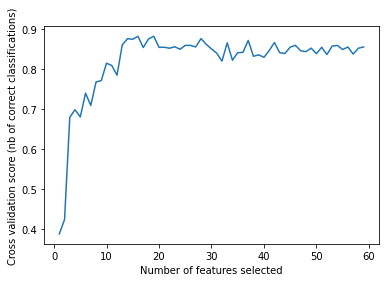

In [ ]:
kf = KFold(n_splits=9, random_state=None, shuffle=False)
model = Perceptron()
rfecv = RFECV(estimator=model, cv=kf,scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
selected = rfecv.support_

In [ ]:
num = 0
todelete = []
for i in selected:
  if i ==False:
    todelete.append(num)
    num += 1

In [ ]:
X_train_selected = X_train.drop(X_train.columns[todelete], axis=1)

In [ ]:
X_test_selected = X_test.drop(X_test.columns[todelete], axis=1)

In [ ]:
kf = KFold(n_splits=9, random_state=None, shuffle=False)
params = {'penalty':['l1', 'l2', 'elasticnet'], 'alpha': [0.1, 0.05, 0.001], 'eta0':[0.5, 1, 5]}
clf = Perceptron()
gs = GridSearchCV(clf, cv=kf, param_grid=params, return_train_score=True)

gs.fit(X_train_selected, y_train)

GridSearchCV(cv=KFold(n_splits=9, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=0, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.05, 0.001], 'eta0': [0.5, 1, 5],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
#Results of grid search with cross validtion
gs.cv_results_

{'mean_fit_time': array([0.12963242, 0.07791853, 0.14833503, 0.13886865, 0.08492819,
        0.16148082, 0.14297467, 0.08879227, 0.15914787, 0.13626054,
        0.08227404, 0.15184299, 0.14312159, 0.0802886 , 0.15084484,
        0.15015199, 0.08202153, 0.15629964, 0.13656582, 0.0802012 ,
        0.13883713, 0.14137581, 0.08151258, 0.14383584, 0.14511416,
        0.0813521 , 0.14720212]),
 'mean_score_time': array([0.00142267, 0.00181291, 0.00142919, 0.00138905, 0.00182054,
        0.00143761, 0.0014428 , 0.00302699, 0.00146937, 0.00140876,
        0.00182239, 0.00144339, 0.00145822, 0.00189794, 0.00144826,
        0.00146053, 0.00182162, 0.00145653, 0.00143602, 0.00187715,
        0.00145952, 0.00146259, 0.00191485, 0.00143353, 0.00152074,
        0.00187029, 0.00143369]),
 'mean_test_score': array([0.33392593, 0.49466667, 0.49466667, 0.34725926, 0.43274074,
        0.43274074, 0.35111111, 0.35348148, 0.35348148, 0.49644444,
        0.56059259, 0.56059259, 0.52125926, 0.48703704, 0.487

In [ ]:
#Best estimator
gs.best_estimator_

Perceptron(alpha=0.001, class_weight=None, early_stopping=False, eta0=1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty='l2', random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Best parameters
gs.best_params_

{'alpha': 0.001, 'eta0': 1, 'penalty': 'l2'}

In [ ]:
#Best score
gs.best_score_

0.7037777777777778

In [ ]:
#Training the model with best parameters
bestclf = Perceptron(alpha= 0.001, eta0= 0.5, penalty= 'l1')
bestclf.fit(X_train_selected, y_train)
tr_p = bestclf.predict(X_train_selected)
print(accuracy_score(y_train, tr_p))
confusion_matrix(y_train, tr_p)

0.7771111111111111


array([[2760,    0,    4,    0,   20],
       [  13, 2431,   58,   49,   31],
       [ 614,    0, 2027,    5,    3],
       [ 197,   59,  332, 1865,   23],
       [ 321, 1184,   54,   42, 1408]])

In [ ]:
#Running the model on the test set
predictions = bestclf.predict(X_test_selected)
print(accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)

0.7256742025688421


array([[4299,   48,   69,    0,   50],
       [ 793, 3411,   31,  167,    0],
       [2862,   23, 1846,   43,    5],
       [  10,  384,   11, 3251,  258],
       [ 312,  445,  107,  170, 2504]])